<a href="https://colab.research.google.com/github/sokhan1/PYTHON/blob/main/Simple_Regression_Assignment_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.17.0


#Simple_Linear_Regression

In [2]:
#1 Data Generation
X = [1,2,3,4,5]
Y = [1,2,3,4,5]

#2 hypothesis
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

def hypothesis(x):
    return W*x+b

#3 cost function

def cost_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_true-y_pred)) #Loss_1/N * sum(squqre(y_pred-y_true))

#4 optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.01)

#5 train
def train():
    with tf.GradientTape() as g:
        pred = hypothesis(X)
        cost = cost_fn(pred, Y)

    # Calculation Gradient
    gradients = g.gradient(cost, [W,b])

    #Update Gradient by W,b
    optimizer.apply_gradients(zip(gradients, [W,b]))


In [3]:
# tf.variable
print(W.numpy())

[-0.04867914]


In [4]:
# reduce mean
a2 = np.ones([2,3])
b2 = np.array([[1.,1.],
               [2.,2.]])
print(b2)
print(tf.reduce_mean(b2).numpy())

[[1. 1.]
 [2. 2.]]
1.5


In [5]:
#zip
a2 = [100,110,120,130,140]
b2 = [10, 20, 30, 40, 50]

for i in zip(a2,b2):
    print(i)
    print(type(i))

for i,j in zip(a2,b2):
    print(i,j)

(100, 10)
<class 'tuple'>
(110, 20)
<class 'tuple'>
(120, 30)
<class 'tuple'>
(130, 40)
<class 'tuple'>
(140, 50)
<class 'tuple'>
100 10
110 20
120 30
130 40
140 50


In [6]:
#training
for step in range(1000):
    train()

    if step%100 == 0:
        pred = hypothesis(X)
        cost = cost_fn(pred, Y)
        print(f"step = {step}, cost = {cost}, W = {W.numpy()}, b = {b.numpy()}")

step = 0, cost = 14.354082107543945, W = [-0.0386792], b = [-0.37629294]
step = 100, cost = 0.46561479568481445, W = [0.7028119], b = [0.35400206]
step = 200, cost = 0.040818870067596436, W = [0.86104095], b = [0.46377727]
step = 300, cost = 0.0320107527077198, W = [0.880581], b = [0.41732422]
step = 400, cost = 0.024116646498441696, W = [0.8963366], b = [0.36221975]
step = 500, cost = 0.017332319170236588, W = [0.91212016], b = [0.30707422]
step = 600, cost = 0.011901852674782276, W = [0.9271776], b = [0.2544623]
step = 700, cost = 0.007813948206603527, W = [0.94099486], b = [0.20618284]
step = 800, cost = 0.004904915578663349, W = [0.9532514], b = [0.16335537]
step = 900, cost = 0.0029424168169498444, W = [0.96379215], b = [0.12652314]


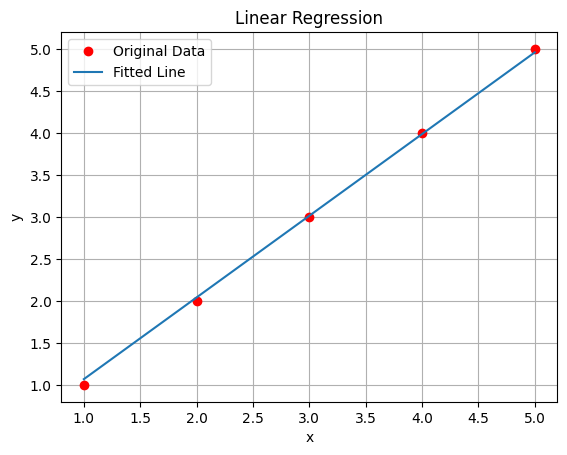

In [7]:
#visualization

import matplotlib.pyplot as plt

plt.plot(X,Y,"ro", label = "Original Data") #bx
plt.plot(X,np.array(W*X + b), label = "Fitted Line")
plt.legend()
plt.grid()
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [8]:
# Prediction or Inference
x_test = [10]
x_test_predict = np.array(W*x_test + b)
print("*"*20)
print("if 10 appear, then correct!\n", x_test_predict)

********************
if 10 appear, then correct!
 [9.821198]


#Non-Linear Modeling

y = ax^2 + bx + c

In [11]:
a = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
c = tf.Variable(tf.random.normal([1]))

print(type(a))
print(a.numpy())
print(type(a.numpy()))
print(b.numpy())
print(c.numpy())

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
[-1.1229177]
<class 'numpy.ndarray'>
[-0.6257429]
[0.48468462]


In [12]:
X = tf.random.normal([50])
Y = X**2 + X*tf.random.normal([50])

In [13]:
X = X.numpy()
Y = Y.numpy()

[-2.04108572 -2.04008572 -2.03908572 ...  2.91991428  2.92091428
  2.92191428]
tf.Tensor(
[ -2.91623    -2.9122727  -2.9083183 ... -10.916313  -10.923498
 -10.930685 ], shape=(4964,), dtype=float32)


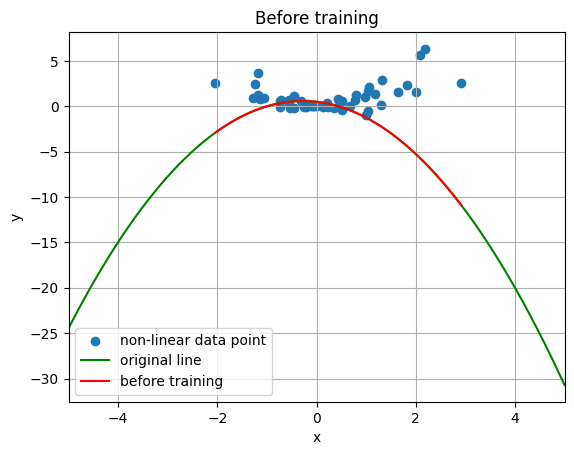

In [20]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*(line_x)**2 + b*(line_x) + c
print(line_x)
print(line_y)

x_ = np.arange(-5.,5.,0.001)
y_ = a*(x_)**2 + b*(x_) + c

plt.scatter(X, Y, label = "non-linear data point")
plt.plot(x_, y_, "g", label = "original line")
plt.plot(line_x, line_y , "r", label ="before training")
plt.legend()
plt.grid()
plt.title("Before training")
plt.xlim(-5.,5,)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [21]:
def hypothesis(x):
    return a*(x)**2 + b*x + c

def cost_fn(pred_y, true_y):
    return tf.reduce_mean(tf.square(pred_y - true_y))

optimizer = tf.optimizers.Adam(learning_rate = 0.01)

def train():
    with tf.GradientTape() as g:
        pred = hypothesis(X)
        cost = cost_fn(pred, Y)
    gradients = g.gradient(cost, [a,b,c]) #Calculate gradients
    optimizer.apply_gradients(zip(gradients, [a,b,c])) # Update calculated gradients

In [22]:
for step in range(1,1001):
    train()

    if step % 100 == 0:
        pred = hypothesis(X)
        cost = cost_fn(pred, Y)
        print(f" step:{step} cost:{cost:.4f} a:{a.numpy()} b:{b.numpy()} c:{c.numpy()}")

 step:100 cost:2.9928 a:[-0.3027504] b:[0.15653603] c:[1.1637031]
 step:200 cost:1.6435 a:[0.08262047] b:[0.3545946] c:[1.0046853]
 step:300 cost:1.2590 a:[0.2904296] b:[0.28259385] c:[0.68956876]
 step:400 cost:1.0996 a:[0.4318422] b:[0.16509381] c:[0.487075]
 step:500 cost:1.0413 a:[0.52309257] b:[0.06982366] c:[0.371205]
 step:600 cost:1.0235 a:[0.57639927] b:[0.00950252] c:[0.30729434]
 step:700 cost:1.0190 a:[0.60457325] b:[-0.02319398] c:[0.27417773]
 step:800 cost:1.0181 a:[0.61804354] b:[-0.0389277] c:[0.25842667]
 step:900 cost:1.0180 a:[0.62386644] b:[-0.04573796] c:[0.2516247]
 step:1000 cost:1.0179 a:[0.62613976] b:[-0.04839712] c:[0.24896966]


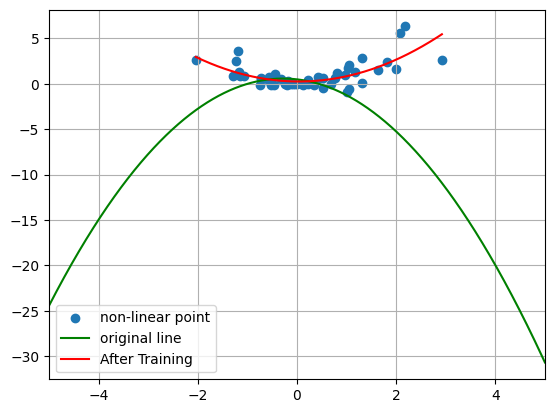

In [23]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*(line_x)**2 + b*(line_x) + c

plt.scatter(X,Y, label = "non-linear point")
plt.plot(x_, y_, 'g', label = "original line")
plt.plot(line_x, line_y, 'r', label = "After Training")
plt.legend()
plt.xlim(-5.,5.)
plt.grid()
plt.show()